**1- Load the dataset and conduct an exploratory analysis: the number of features, correlations in the data, statistical indicators (of position, dispersion).**

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv")
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,...,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,...,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,...,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,...,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,...,3,116,116,116,0,1,8.7,very bad,1,5


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [96]:
# Print the correlations between the features
print("Correlations: \n", df.corr())

Correlations: 
                         MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  \
MAX_TEMPERATURE_C                1.000000           0.849326   
MIN_TEMPERATURE_C                0.849326           1.000000   
WINDSPEED_MAX_KMH               -0.327096          -0.100506   
TEMPERATURE_MORNING_C            0.794239           0.935416   
TEMPERATURE_NOON_C               0.985586           0.893272   
TEMPERATURE_EVENING_C            0.987956           0.842312   
PRECIP_TOTAL_DAY_MM             -0.177971          -0.013854   
HUMIDITY_MAX_PERCENT            -0.179855          -0.074038   
VISIBILITY_AVG_KM                0.063794          -0.091817   
PRESSURE_MAX_MB                 -0.066079          -0.171817   
CLOUDCOVER_AVG_PERCENT          -0.364686          -0.015391   
HEATINDEX_MAX_C                  0.994094           0.857023   
DEWPOINT_MAX_C                   0.800846           0.911932   
WINDTEMP_MAX_C                   0.860801           0.985388   
WEATHER_CODE_MORNING    

In [97]:
# Print the number of features
print("Number of features: ", df.shape)

Number of features:  (366, 24)


In [98]:
# Print the statistical indicators of position and dispersion
print("Statistical indicators: \n", df.describe())

Statistical indicators: 
        MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
count         366.000000         366.000000         366.000000   
mean           16.997268          11.259563          20.991803   
std             6.369232           4.510670           8.546565   
min             5.000000           0.000000           3.000000   
25%            12.000000           8.000000          14.000000   
50%            16.000000          11.000000          20.000000   
75%            21.000000          15.000000          26.000000   
max            38.000000          23.000000          50.000000   

       TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
count             366.000000          366.000000             366.000000   
mean               10.631148           15.770492              15.275956   
std                 4.601133            6.018857               6.450046   
min                -1.000000            3.000000               3.000000   
25% 

**2- Create a slice of the dataset with only the numeric columns (you can use the method .select_dtypes(include='number') to help you). You will name this slice: X. This slice X must have 366 rows and 22 columns. Create a second slice with only the column OPINION. You will name this slice y.**

In [99]:
# Create a slice X with only the numeric columns
X = df.select_dtypes(include='number')

# Check the shape of X
print("X shape: ", X.shape)  # (366, 22)

# Create a slice y with only the column 'OPINION'
y = df[['OPINION']]

# Check the shape of y
print("y shape: ", y.shape)  # (366, 1)

X shape:  (366, 22)
y shape:  (366, 1)


**3- Use a scaler to scale your data. You will transform your data with this scaler, and save the scaled data in X_scaled, which must also have 366 rows and 22 columns.**

In [100]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on X
scaler.fit(X)
X_scaled = scaler.transform(X)

# Check the shape of X_scaled
print("X_scaled shape: ", X_scaled.shape)


X_scaled shape:  (366, 22)


**4- Instantiate a pca object, and train it on your standardized data.**

In [101]:
from sklearn.decomposition import PCA

# Instantiate a PCA object
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit and transform the PCA on X_scaled
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(366, 22)

**5- How many principal components explain at least 70% of the variance? You can use the attribute pca.explained_variance_ratio_. How about 80%?**

In [102]:
pca.explained_variance_ratio_

array([4.09974128e-01, 2.08764137e-01, 6.44852689e-02, 5.96277270e-02,
       4.57715483e-02, 3.90945593e-02, 2.96727035e-02, 2.79956895e-02,
       2.50111074e-02, 2.23798923e-02, 2.06096373e-02, 1.72091698e-02,
       1.06921087e-02, 5.50690832e-03, 5.23972301e-03, 3.80814302e-03,
       2.24566722e-03, 7.91559882e-04, 5.45015534e-04, 4.08638014e-04,
       1.66668050e-04, 5.24109907e-36])

In [103]:
# Find the number of components that explain at least 70% of the variance
n_components = sum(pca.explained_variance_ratio_ >= 0.7)
print("Number of components that explain at least 70% of the variance: ", n_components)

Number of components that explain at least 70% of the variance:  0


In [104]:
# Find the number of components that explain at least 80% of the variance
n_components = sum(pca.explained_variance_ratio_ >= 0.8)
print("Number of components that explain at least 80% of the variance: ", n_components)

Number of components that explain at least 80% of the variance:  0


**6- Transform your data with pca.fit_transform(X_scaled), and store the result in X_pca. Display on a scatterplot the first 2 columns (those that explain the most variance). Put a different color for each OPINION.**

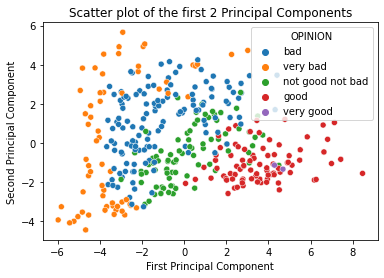

In [105]:
# fit_transform the data
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the first 2 columns of X_pca
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['OPINION'])

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot of the first 2 Principal Components')

# show the plot
plt.show()


**7- . Run a KNN classification on X_scaled and y. What is your score? Run another KNN classification on the first two columns of X_pca and y. Is the score very different?**

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("KNN classification score on X_scaled: ", accuracy)

KNN classification score on X_scaled:  0.7837837837837838


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**To run another KNN classification on the first two columns of X_pca and y, we just need to change the X_train and X_test variable to X_pca[:,:2] and run the same process as above.**

In [107]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:2], y, test_size=0.2, random_state=42)

# Instantiate a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("KNN classification score on X_pca: ", accuracy)

KNN classification score on X_pca:  0.7567567567567568


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
